In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import os
import numpy as np
from hangul.read_data import load_data, load_all_labels, load_images
import umap
import pandas as pd
from sklearn.decomposition import PCA, FastICA
from scipy.stats import gaussian_kde
from bokeh.palettes import Greys256, Inferno256, Plasma256, inferno, viridis, grey
import matplotlib.font_manager as mfm
from hangul import style

In [3]:
fonts = ['GothicA1-Regular', 'NanumMyeongjo', 'NanumBrush', 'Stylish-Regular']

In [4]:
fontsfolder = '/data/hangul/h5s'
fontnames = os.listdir(fontsfolder)

In [5]:
for font in [fonts[0]]:
    filename = os.path.join(fontsfolder, '{}/{}_24.h5'.format(font, font))
    image, label, initial, medial, final = load_data(filename, median_shape=True)
    imf, style = load_all_labels(filename)

In [7]:
font_path = "/home/ahyeon96/GothicA1-Regular.ttf"
prop = mfm.FontProperties(fname=font_path)

In [8]:
image = image.reshape(11172,-1)

In [ ]:
emb = umap.UMAP(random_state=0, learning_rate=0.01, n_neighbors = 100).fit_transform(image)
np.savez('/home/ahyeon96/hangul_misc/umap_emb.npz', data=emb)

In [9]:
emb = np.load('/home/ahyeon96/hangul_misc/umap_emb.npz')
emb = emb['data']
x = emb[:,0]
y = emb[:,1]
xmin = np.min(x)
xmax = np.max(x)
ymin = np.min(y)
ymax = np.max(y)
X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([x, y])
kernel = gaussian_kde(values)
Z = np.reshape(kernel(positions).T, X.shape)

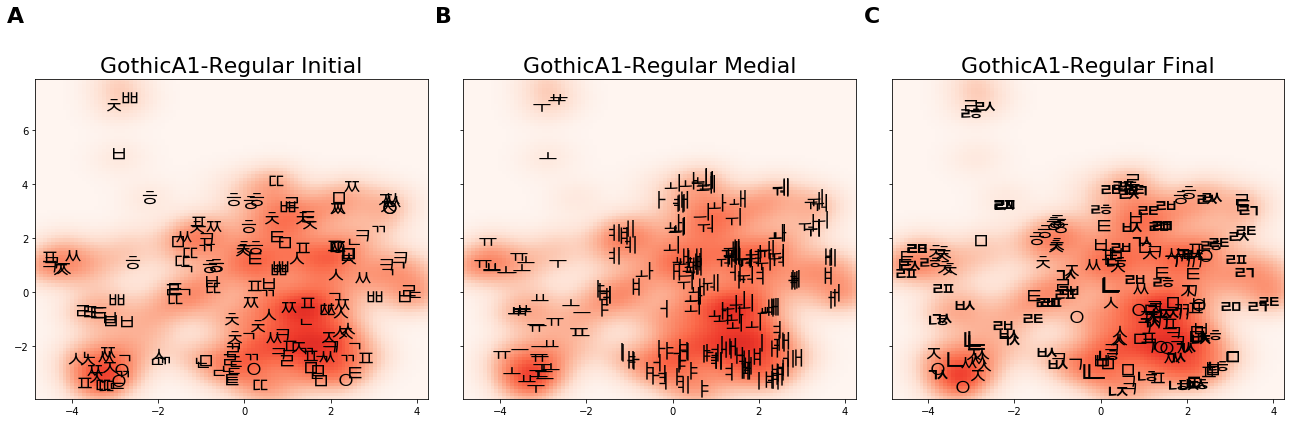

In [24]:
# appendix figure 9

fig, axes = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(18,6))
title = ['Initial', 'Medial', 'Final']
abc = ['A', 'B', 'C']
ranges = [19,21,28]

init_chars = ['ᆨ', 'ᆩ', 'ᆫ', 'ᆮ', 'ㄸ', 'ㄹ', 'ㅁ', 'ㅂ', 'ㅃ', 'ㅅ', 'ㅆ', 'ㅇ', 'ㅈ', 'ㅉ', 'ㅊ', 'ㅋ', 'ㅌ', 'ㅍ', 'ㅎ']
med_chars = ['ㅏ', 'ㅐ', 'ㅑ', 'ㅒ', 'ㅓ', 'ㅔ', 'ㅕ', 'ㅖ', 'ㅗ', 'ㅘ', 'ㅙ',
              'ㅚ', 'ㅛ', 'ㅜ', 'ㅝ', 'ㅞ', 'ㅟ', 'ㅠ', 'ㅡ', 'ㅢ', 'ㅣ']
fin_chars = ['', 'ㄱ', 'ㄲ', 'ᆪ', 'ㄴ', 'ᆬ', 'ᆭ', 'ㄷ', 'ㄹ', 'ᆰ', 'ᆱ', 'ᆲ', 'ᆳ', 'ᆴ', 'ᆵ', 'ᆶ',
              'ㅁ', 'ㅂ', 'ᆹ', 'ㅅ', 'ㅆ', 'ㅇ', 'ㅈ', 'ㅊ', 'ㅋ', 'ㅌ', 'ㅍ', 'ㅎ']
small = ['ᆪ', 'ㄴ', 'ᆬ', 'ᆭ','ᆰ', 'ᆱ', 'ᆲ', 'ᆳ', 'ᆴ', 'ᆵ', 'ᆶ','ᆹ']
label_name = [init_chars, med_chars, fin_chars]
sizes = [10,10,8]
ints = [21*28,19*28,19*21]
eps = 0.3

for i in range(3):
    lab = label[:,i]
    axes[i].imshow(np.rot90(Z), cmap=plt.cm.Reds, extent=[xmin, xmax, ymin, ymax], vmin=np.min(Z), vmax=1.5*np.max(Z), aspect='auto',
                  rasterized=True)
    for k in range(ranges[i]):
        idxs = np.nonzero(lab == k)[0]
        for j in np.random.permutation(ints[i])[:sizes[i]]:
            xj = x[idxs[j]]
            yj = y[idxs[j]]
            if (abs(xj-xmax) > eps) and (abs(xj-xmin) > eps) and (abs(yj-ymax) > eps) and (abs(yj-ymin) > eps):
                if label_name[i][k] in small:
                    axes[i].text(xj, yj, label_name[i][k], fontproperties=prop, fontsize=28,
                        horizontalalignment='center', verticalalignment='center')
                else:
                    axes[i].text(xj, yj, label_name[i][k], fontproperties=prop, fontsize=20,
                            horizontalalignment='center', verticalalignment='center')
    axes[i].set_xlim([xmin, xmax])
    axes[i].set_ylim([ymin, ymax])
    axes[i].set_title('GothicA1-Regular {}'.format(title[i]), fontsize=22)
    axes[i].text(-5.5,10, '{}'.format(abc[i]), fontsize=22, fontweight='bold')
plt.tight_layout()
plt.savefig('/home/ahyeon96/hangul_misc/umap_chars.png', dpi=300)
plt.show()

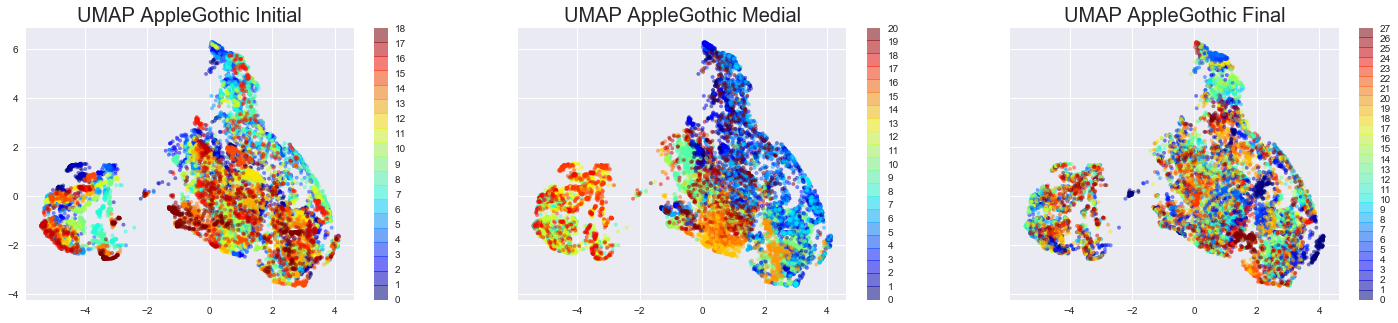

In [13]:
# umap single font
label_type = ['Initial', 'Medial', 'Final']
label_num = [19,21,28]

fig, ax = plt.subplots(1,3, sharey=True, figsize=(25,5))
for i in range(3):
    labels = label[:,i]
    transformed_umap = umap.UMAP(random_state=0, learning_rate=0.01, n_neighbors = 100).fit_transform(image)
    g = ax[i].scatter(transformed_umap[:,0], transformed_umap[:,1], c=labels, cmap=plt.get_cmap("jet", label_num[i]), marker='.', alpha=0.5)
    ax[i].set_title('UMAP AppleGothic {}'.format(label_type[i]), fontsize=20)
    plt.colorbar(g, ticks=range(label_num[i]), ax=ax[i])
plt.savefig('/Users/ahyeon/Desktop/umap_single.pdf')
plt.show()

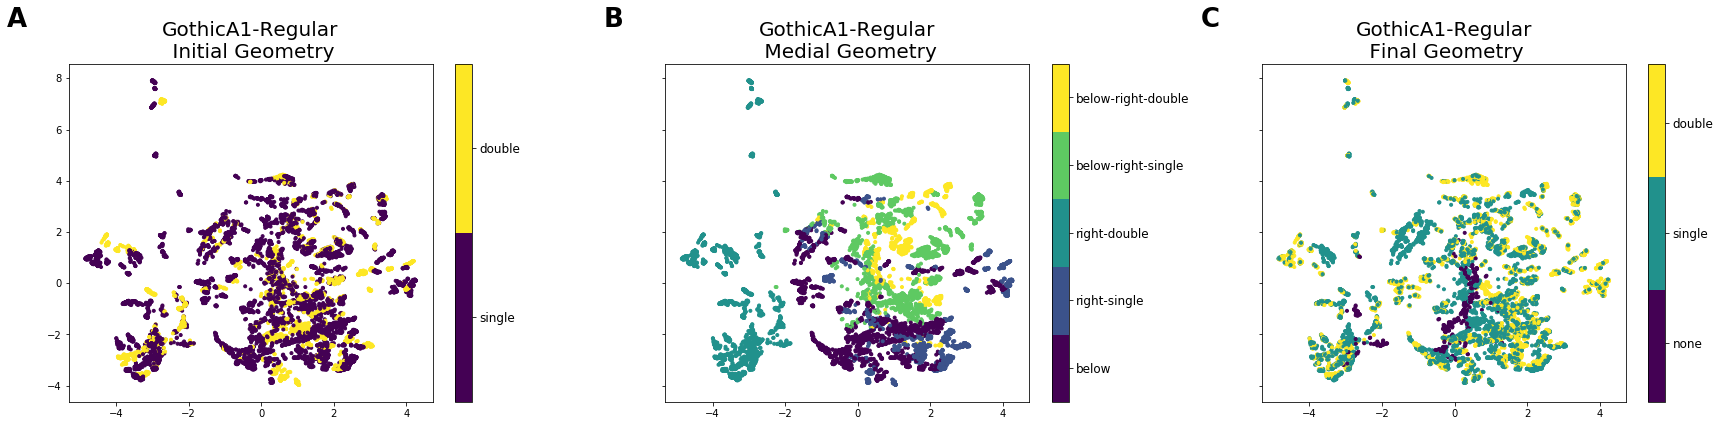

In [23]:
# appendix figure 10 

label_type = ['Initial', 'Medial', 'Final']
label_num = [2,5,3]
plot_labs = ['A', 'B', 'C']
colorbar_labs = [['single','double'],['below','right-single','right-double','below-right-single','below-right-double'],
                ['none','single','double']]
ticks = [[0.25, 0.75],[0.4,1.2,2,2.8,3.6],[0.35,1,1.65]]


f, ax = plt.subplots(1,3, sharey=True, figsize=(24,6))
image = image.reshape(11172,-1)
for i in range(3):
    labels = style[:,i]
    g = ax[i].scatter(emb[:,0], emb[:,1], c=labels, cmap=plt.get_cmap("viridis", label_num[i]), marker='.')
    ax[i].set_title('GothicA1-Regular\n {} Geometry'.format(label_type[i]), fontsize=20)
    ax[i].text(-7,10, plot_labs[i], fontweight='bold', fontsize=26)
    cbar = plt.colorbar(g, ticks=ticks[i], ax=ax[i])
    cbar.ax.set_yticklabels(colorbar_labs[i], fontsize=12)
plt.tight_layout()
plt.savefig('/home/ahyeon96/hangul_misc/umap_geometry.pdf', dpi=300, bbox_inches='tight')
plt.show()